In [2]:
## LeoZ_Notebook
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
## import plotly.graph_objects as go
from scipy.stats import linregress


In [3]:
# Import csv files
ax_csv = pd.read_csv("../Resources/ad_clean.csv")
ax_csv.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,4/23/2020,23.5,22.7,24.3,22.7 - 24.3,NaN,17
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,4/23/2020,32.7,30.2,35.2,30.2 - 35.2,NaN,17
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,4/23/2020,25.7,24.1,27.3,24.1 - 27.3,NaN,17
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,4/23/2020,24.8,23.3,26.2,23.3 - 26.2,NaN,17
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,4/23/2020,23.2,21.5,25.0,21.5 - 25.0,NaN,17


In [3]:
ax_csv.dtypes

Indicator               object
Group                   object
State                   object
Subgroup                object
Week                     int64
Week Label              object
Value                  float64
Low CI                 float64
High CI                float64
Confidence Interval     object
Quartile range          object
Weeknum                  int64
dtype: object

In [4]:
cal = ax_csv.loc[(ax_csv["State"]=="California")&(ax_csv["Subgroup"]=="California")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
cal.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
93,Symptoms of Anxiety Disorder,By State,California,California,1,4/23/2020,30.8,28.2,33.5,28.2 - 33.5,30.4 - 31.6,17
303,Symptoms of Anxiety Disorder,By State,California,California,2,5/7/2020,31.4,27.4,35.6,27.4 - 35.6,28.8 - 31.5,19
513,Symptoms of Anxiety Disorder,By State,California,California,3,5/14/2020,32.3,29.0,35.7,29.0 - 35.7,28.9-36.1,20
723,Symptoms of Anxiety Disorder,By State,California,California,4,5/21/2020,30.4,27.4,33.6,27.4 - 33.6,28.7-30.6,21
933,Symptoms of Anxiety Disorder,By State,California,California,5,5/28/2020,33.8,31.5,36.2,31.5 - 36.2,31.8-37.1,22


R Val is 0.6010844203482514


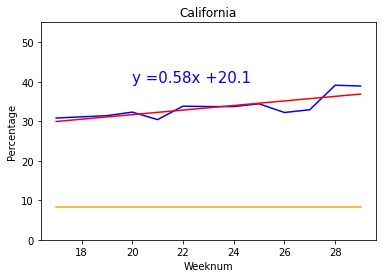

In [5]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = cal["Value"]
month = cal["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="blue", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="red", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("California")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = cal['Weeknum']
y_values = cal['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="blue")

plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.show()

In [6]:
tx = ax_csv.loc[(ax_csv["State"]=="Texas")&(ax_csv["Subgroup"]=="Texas")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
tx.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
132,Symptoms of Anxiety Disorder,By State,Texas,Texas,1,4/23/2020,29.7,25.9,33.7,25.9 - 33.7,27.9 - 30.3,17
342,Symptoms of Anxiety Disorder,By State,Texas,Texas,2,5/7/2020,32.4,28.2,36.9,28.2 - 36.9,31.6 - 38.3,19
552,Symptoms of Anxiety Disorder,By State,Texas,Texas,3,5/14/2020,28.8,26.1,31.7,26.1 - 31.7,27.5-28.8,20
762,Symptoms of Anxiety Disorder,By State,Texas,Texas,4,5/21/2020,32.6,29.0,36.3,29.0 - 36.3,30.7-36.0,21
972,Symptoms of Anxiety Disorder,By State,Texas,Texas,5,5/28/2020,31.1,27.7,34.6,27.7 - 34.6,29.7-31.7,22


R Val is 0.7470268535788058


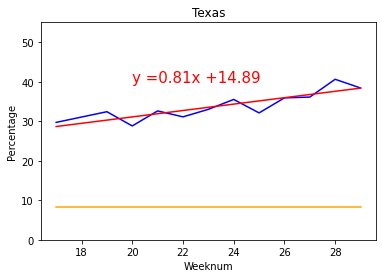

In [7]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = tx["Value"]
month = tx["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="blue", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="blue", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Texas")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = tx['Weeknum']
y_values = tx['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.show()

In [8]:
ga = ax_csv.loc[(ax_csv["State"]=="Georgia")&(ax_csv["Subgroup"]=="Georgia")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
ga.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
99,Symptoms of Anxiety Disorder,By State,Georgia,Georgia,1,4/23/2020,31.9,28.1,35.9,28.1 - 35.9,31.7 - 37.0,17
309,Symptoms of Anxiety Disorder,By State,Georgia,Georgia,2,5/7/2020,29.5,24.2,35.4,24.2 - 35.4,28.8 - 31.5,19
519,Symptoms of Anxiety Disorder,By State,Georgia,Georgia,3,5/14/2020,27.6,23.7,31.7,23.7 - 31.7,27.5-28.8,20
729,Symptoms of Anxiety Disorder,By State,Georgia,Georgia,4,5/21/2020,32.6,28.6,36.8,28.6 - 36.8,30.7-36.0,21
939,Symptoms of Anxiety Disorder,By State,Georgia,Georgia,5,5/28/2020,31.7,27.8,35.8,27.8 - 35.8,29.7-31.7,22


R Val is 0.5572564983353001


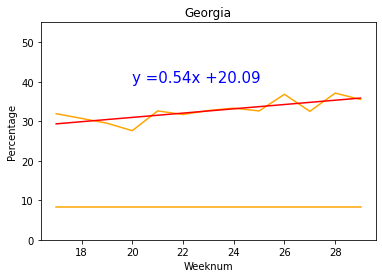

In [9]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = ga["Value"]
month = ga["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="orange", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="orange", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Georgia")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = ga['Weeknum']
y_values = ga['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="blue")

plt.plot(x_values, regress_values, "r-")


plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.show()

In [10]:
fla = ax_csv.loc[(ax_csv["State"]=="Florida")&(ax_csv["Subgroup"]=="Florida")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
fla.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
98,Symptoms of Anxiety Disorder,By State,Florida,Florida,1,4/23/2020,32.6,29.7,35.6,29.7 - 35.6,31.7 - 37.0,17
308,Symptoms of Anxiety Disorder,By State,Florida,Florida,2,5/7/2020,27.6,23.1,32.5,23.1 - 32.5,26.3 - 28.7,19
518,Symptoms of Anxiety Disorder,By State,Florida,Florida,3,5/14/2020,28.2,25.1,31.4,25.1 - 31.4,27.5-28.8,20
728,Symptoms of Anxiety Disorder,By State,Florida,Florida,4,5/21/2020,34.1,31.2,37.2,31.2 - 37.2,30.7-36.0,21
938,Symptoms of Anxiety Disorder,By State,Florida,Florida,5,5/28/2020,33.8,30.3,37.5,30.3 - 37.5,31.8-37.1,22


R Val is 0.5462765432088214


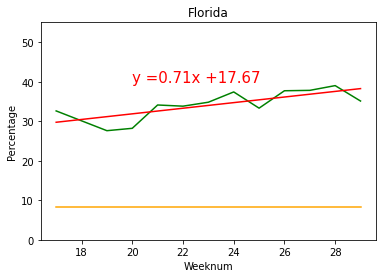

In [11]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = fla["Value"]
month = fla["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="green", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="green", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Florida")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = fla['Weeknum']
y_values = fla['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")

plt.ylim(0,ax_csv["Value"].max())

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.show()

In [12]:
sd = ax_csv.loc[(ax_csv["State"]=="South Dakota")&(ax_csv["Subgroup"]=="South Dakota")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
sd.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
130,Symptoms of Anxiety Disorder,By State,South Dakota,South Dakota,1,4/23/2020,22.1,17.3,27.6,17.3 - 27.6,21.7 - 27.8,17
340,Symptoms of Anxiety Disorder,By State,South Dakota,South Dakota,2,5/7/2020,26.1,17.9,35.7,17.9 - 35.7,20.3 - 26.2,19
550,Symptoms of Anxiety Disorder,By State,South Dakota,South Dakota,3,5/14/2020,22.3,16.4,29.1,16.4 - 29.1,19.0-25.2,20
760,Symptoms of Anxiety Disorder,By State,South Dakota,South Dakota,4,5/21/2020,30.4,24.6,36.6,24.6 - 36.6,28.7-30.6,21
970,Symptoms of Anxiety Disorder,By State,South Dakota,South Dakota,5,5/28/2020,26.3,21.8,31.1,21.8 - 31.1,18.4-26.7,22


R Val is 0.40071843872415014


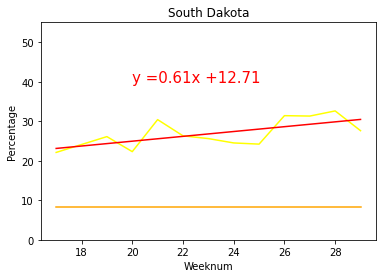

In [13]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = sd["Value"]
month = sd["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="yellow", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="yellow", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("South Dakota")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = sd['Weeknum']
y_values = sd['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")


plt.ylim(0,ax_csv["Value"].max())

print(f"R Val is {rvalue**2}")


In [14]:
md = ax_csv.loc[(ax_csv["State"]=="Maryland")&(ax_csv["Subgroup"]=="Maryland")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
md.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
109,Symptoms of Anxiety Disorder,By State,Maryland,Maryland,1,4/23/2020,27.7,24.6,31.1,24.6 - 31.1,21.7 - 27.8,17
319,Symptoms of Anxiety Disorder,By State,Maryland,Maryland,2,5/7/2020,30.1,24.2,36.6,24.2 - 36.6,28.8 - 31.5,19
529,Symptoms of Anxiety Disorder,By State,Maryland,Maryland,3,5/14/2020,28.3,25.1,31.7,25.1 - 31.7,27.5-28.8,20
739,Symptoms of Anxiety Disorder,By State,Maryland,Maryland,4,5/21/2020,25.8,21.8,30.0,21.8 - 30.0,24.8-28.6,21
949,Symptoms of Anxiety Disorder,By State,Maryland,Maryland,5,5/28/2020,26.1,22.7,29.6,22.7 - 29.6,18.4-26.7,22


R Val is 0.22882794974968293


(0.0, 55.0)

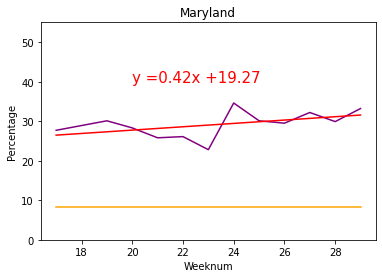

In [15]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = md["Value"]
month = md["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="purple", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="purple", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Maryland")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = md['Weeknum']
y_values = md['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")

print(f"R Val is {rvalue**2}")

plt.ylim(0,ax_csv["Value"].max())

In [16]:
us = ax_csv.loc[(ax_csv["State"]=="United States")&(ax_csv["Subgroup"]=="United States")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder")]
us.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,4/23/2020,30.8,30.0,31.7,30.0 - 31.7,NaN,17
280,Symptoms of Anxiety Disorder,National Estimate,United States,United States,2,5/7/2020,30.0,28.9,31.0,28.9 - 31.0,NaN,19
490,Symptoms of Anxiety Disorder,National Estimate,United States,United States,3,5/14/2020,28.2,27.6,28.9,27.6 - 28.9,NaN,20
700,Symptoms of Anxiety Disorder,National Estimate,United States,United States,4,5/21/2020,29.4,28.8,30.1,28.8 - 30.1,NaN,21
910,Symptoms of Anxiety Disorder,National Estimate,United States,United States,5,5/28/2020,30.6,30.0,31.2,30.0 - 31.2,NaN,22


R Val is 0.7380991535979161


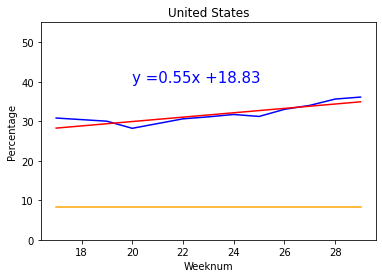

In [17]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = us["Value"]
month = us["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="blue", label="Symptoms of Anxiety Disorder")
# covid, = plt.plot(percentage, month, color="purple", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("United States")
plt.xlabel("Weeknum")
plt.ylabel("Percentage")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = us['Weeknum']
y_values = us['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (20,40), fontsize = 15, color="blue")

plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),8.2), color="orange")
plt.ylim(0,ax_csv["Value"].max())

print(f"R Val is {rvalue**2}")